In [1]:
# importing the libraries
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import sklearn
import sys
import os 

In [2]:
os.chdir("D:\Documents")
warnings.filterwarnings('ignore')


In [3]:
#%%   importing the data
df=pd.read_csv('credit_risk.csv')


In [4]:
#%% converting into train and test as there is no test file 
df_train, test= train_test_split(df, test_size=0.2, random_state=1) # we will not make changes to test file


In [9]:
#%% for columns
df_train.columns   # all columns of data

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df_train.shape   # shape of data


(491, 13)

In [6]:
df_train.size   # shape of data

6383

In [7]:
df_train.head()   # for first 5 rows and all columns

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
291,LP001938,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
328,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
69,LP001241,Female,No,0,Graduate,No,4300,0.0,136.0,360.0,0.0,Semiurban,N


In [8]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,474.000000,481.000000,447.000000
mean,5531.293279,1584.089450,148.432489,340.415800,0.838926
std,6469.419875,3042.667718,90.648688,66.596998,0.368011
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2908.500000,0.000000,100.000000,360.000000,1.000000
50%,3850.000000,997.000000,127.000000,360.000000,1.000000
75%,5876.000000,2250.000000,170.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


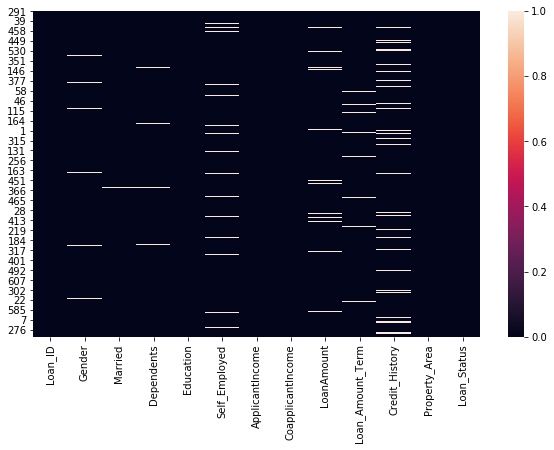

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isnull())  # plotting graph ato check for the missing value
plt.savefig('heatmap.png')
plt.show()

In [52]:
plt.savefig('heatmap.pdf')

<Figure size 432x288 with 0 Axes>

In [10]:
df_train.isnull().sum()

Loan_ID               0
Gender                9
Married               2
Dependents           10
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           17
Loan_Amount_Term     10
Credit_History       44
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
gender=df.Gender.value_counts()
gender

Male      489
Female    112
Name: Gender, dtype: int64

# _---visualization of data______________
# check the distribution of persons who takes the loan male or female

In [12]:
def male_percent(df):
    gender=df.Gender.value_counts()
    male=gender.loc['Male']
    female=gender.loc['Female']
    male_ratio=male/(male+female)
    return male_ratio

In [20]:
male_ratio=male_percent(df_train)
female_ratio=1-male_ratio
male_ratio
#%%
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
291,LP001938,Male,Yes,2,Graduate,No,4400,0.0,127.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N
328,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,N
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
69,LP001241,Female,No,0,Graduate,No,4300,0.0,136.0,360.0,0.0,Semiurban,N


In [14]:
#sns.scatterplot(y='LoanAmount', x="ApplicantIncome", data=df_train)
#plt.savefig('scatterplot.png')
#plt.show()

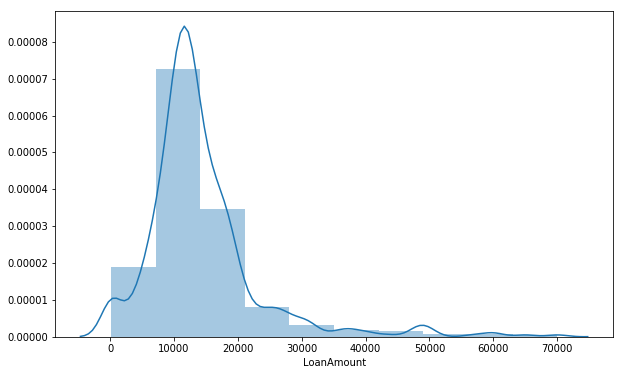

In [46]:
plt.figure(figsize=(10,6))
sns.distplot(df_train.LoanAmount.dropna(), bins=10)
plt.show()

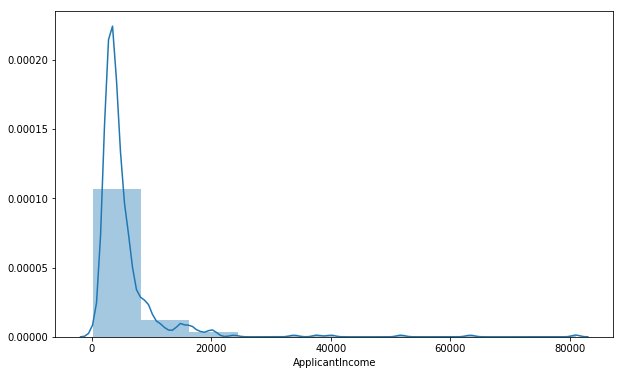

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df_train['ApplicantIncome'], bins=10)  # Clearly distribution is not normal
plt.show()

In [17]:
gender_mode=df_train.Gender.mode()
married_mode=df_train.Married.mode()
dependent_mode=df_train.Dependents.mode()
education_mode=df_train.Education.mode()
self_employed_mode=df_train.Self_Employed.mode()
loam_anmout=df_train.LoanAmount.median()
Loan_Amount_Term_median=df_train.Loan_Amount_Term.median()
Credit_History_mode=df_train.Credit_History.mode()


In [18]:

def fill_gender(df):
    df.Gender.fillna(gender_mode[0], inplace=True)
    return df

In [28]:
def fill_married(df):
    df.Married.fillna(married_mode[0], inplace=True)
    return df

In [29]:
def fill_dependent(df):
    df.Dependents.fillna(dependent_mode[0], inplace=True)
    return df

In [30]:
def fill_education(df):
    df.Education.fillna(education_mode[0], inplace=True)
    return df


In [31]:
def fill_self_employed(df):
    df.Self_Employed.fillna(self_employed_mode[0], inplace=True)
    return df

In [32]:
def fill_LoanAmount(df):
    df.LoanAmount.fillna(loam_anmout, inplace=True)
    return df

In [33]:
def fill_Loan_Amount_Term(df):
    df.Loan_Amount_Term.fillna(Loan_Amount_Term_median, inplace=True)
    return df


In [34]:
def fill_Credit_History(df):
    df.Credit_History=df.Credit_History.fillna(Credit_History_mode[0], inplace=False)
    return df


In [35]:
def multiply(df):
    df.LoanAmount=df.LoanAmount*100
    df.ApplicantIncome=df.ApplicantIncome*10
    df.CoapplicantIncome=df.CoapplicantIncome*10
    return df

In [36]:
def label_encoder(df):
    label=LabelEncoder()
    columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
    for column in columns:
        df[column]=label.fit_transform(df[column])
    return df

In [37]:
def encode_data(df):
    df=fill_gender(df)
    df=fill_married(df)
    df=fill_dependent(df)
    df=fill_education(df)
    df=multiply(df)
    df=fill_self_employed(df)
    df=fill_LoanAmount(df)
    df=fill_Loan_Amount_Term(df)
    df=fill_Credit_History(df)
    df=label_encoder(df)
    return df


In [38]:
df_train=encode_data(df_train)

In [39]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
291,LP001938,1,1,2,0,0,44000,0.0,12700.0,360.0,0.0,1,0
507,LP002625,1,0,0,0,0,35830,0.0,9600.0,360.0,1.0,2,0
328,LP002086,0,1,0,0,0,43330,24510.0,11000.0,360.0,1.0,2,0
609,LP002978,0,0,0,0,0,29000,0.0,7100.0,360.0,1.0,0,1
69,LP001241,0,0,0,0,0,43000,0.0,13600.0,360.0,0.0,1,0


In [40]:
x=df_train.drop(['Loan_ID','Loan_Status'], axis=1)
y=df_train['Loan_Status']


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=12, test_size=0.2)

In [42]:
#%%
log_model=LogisticRegression()
log_model.fit(x_train, y_train)
predict=log_model.predict(x_train)
score_x_train=accuracy_score(y_train, predict)
print(score_x_train)


0.6760204081632653


In [43]:
test=encode_data(test)
testx=test.drop(['Loan_ID','Loan_Status'], axis=1)
testy=test['Loan_Status']


In [44]:
predict_testx=log_model.predict(testx)
final_test=accuracy_score(testy, predict_testx)
print(final_test)

0.6747967479674797
